In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/Users/rubenbroekx/Documents/Projects/agoro-field-boundary-detector


# Data Augmentation

Perform data augmentation on the annotated field-data in order to create more training data.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

from src.agoro_field_boundary_detector.augmentation import load_annotations, polygons_to_mask, transform
from src.agoro_field_boundary_detector.augmentation.transformations import t_linear, t_quartile, t_rotation, t_flip, t_blur, t_gamma

## Data

Load in the (example) image together with its corresponding annotations.

In [3]:
# Image to load
NAME = '41.481412--88.842236'

In [4]:
# Load in the annotations
annotations = load_annotations(Path.cwd() / 'data/annotations.json')
boundaries = annotations[NAME]

In [5]:
# Load in field and mask
field = np.asarray(Image.open(Path.cwd() / f"data/raw/{NAME}.png"))
mask = polygons_to_mask(boundaries)

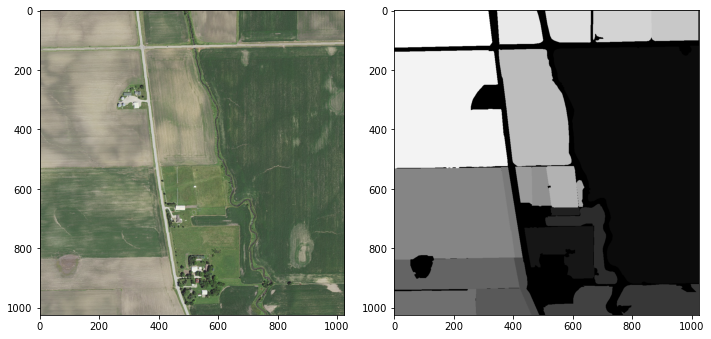

In [6]:
def show_image(field:np.ndarray, mask:np.ndarray):
    """Show the field and corresponding mask."""
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    ax1.imshow(field)
    plt.gray()
    ax2.imshow(mask)
    plt.tight_layout()
    plt.show()
    
show_image(field, mask)

## Transformations

Apply the different transformation and visualise the result.

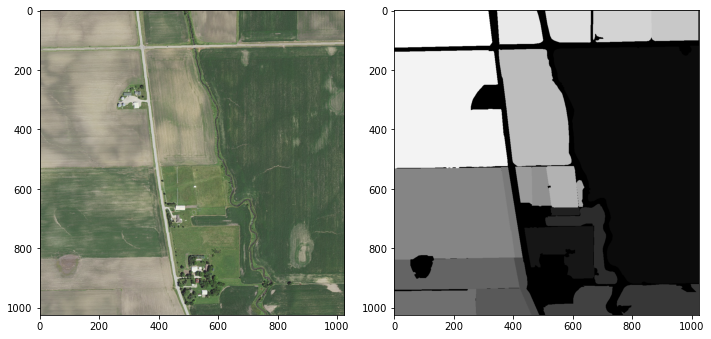

In [7]:
f,m = t_linear(field, mask)
show_image(f,m)

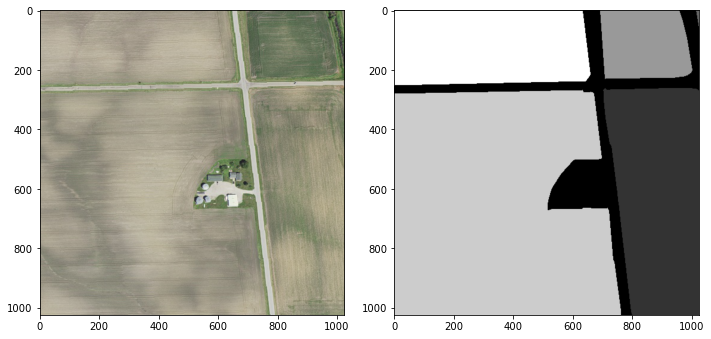

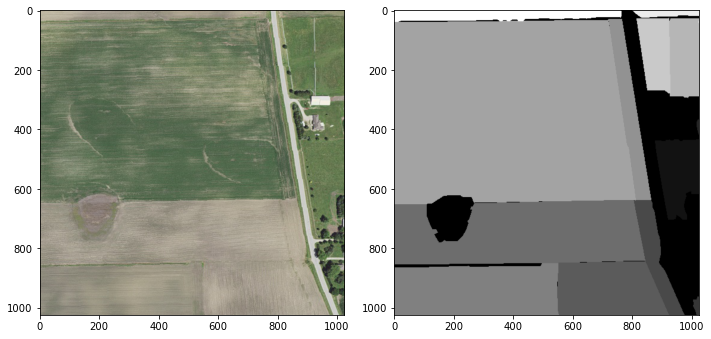

In [8]:
for idx in (0, 2):
    f,m = t_quartile(field, mask, idx=idx)
    show_image(f,m)

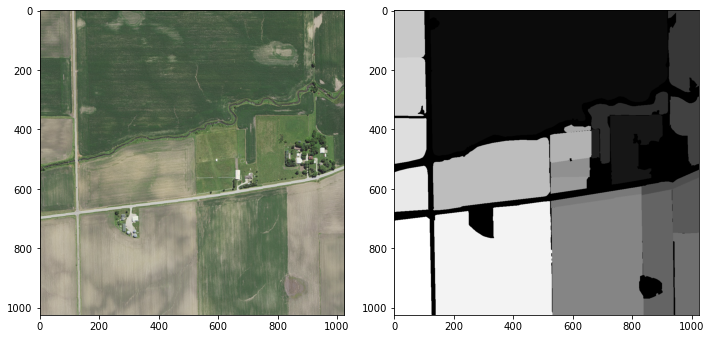

In [9]:
f,m = t_rotation(field, mask, rot=1)
show_image(f,m)

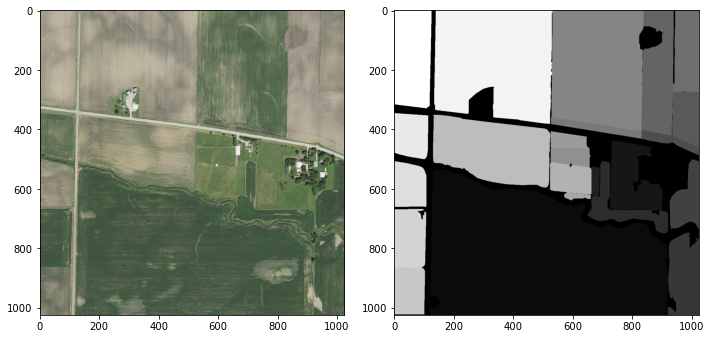

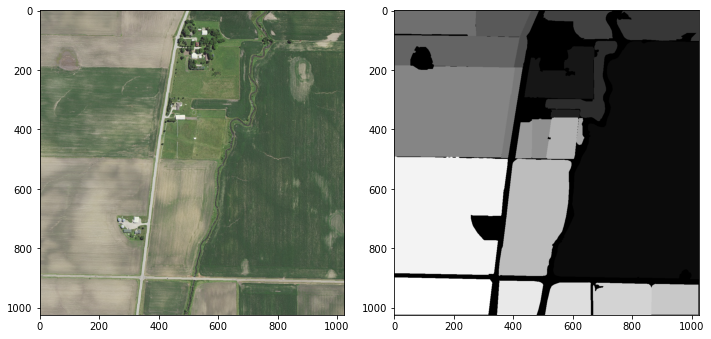

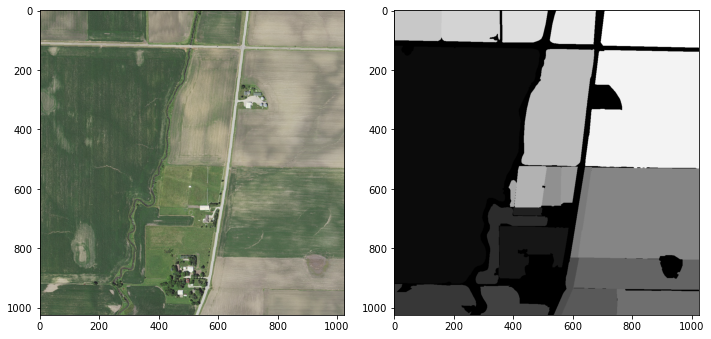

In [10]:
for idx in (0,1,2):
    f,m = t_flip(field, mask, idx=idx)
    show_image(f,m)

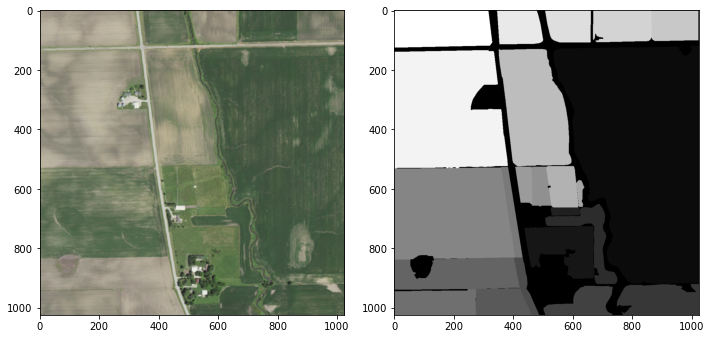

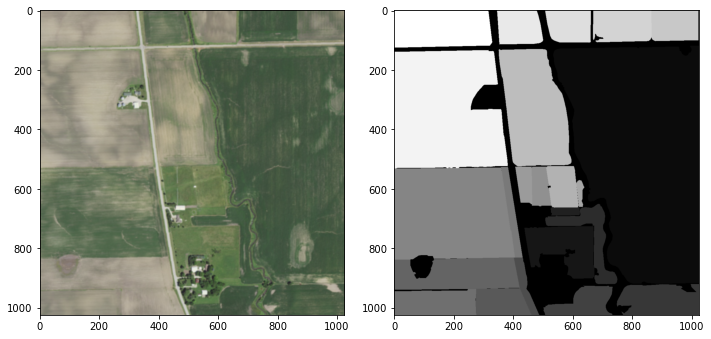

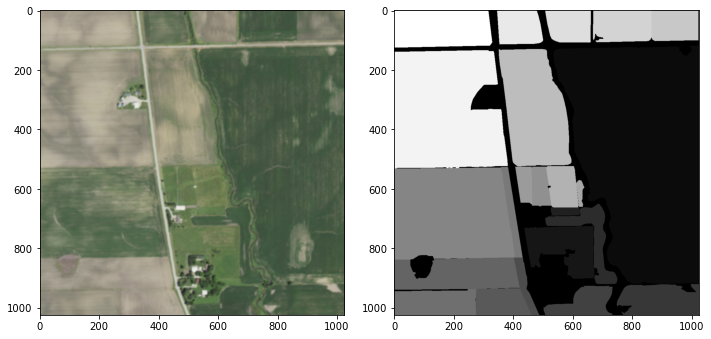

In [11]:
for sigma in (1, 5, 10):
    f,m = t_blur(field, mask, sigma=sigma)
    show_image(f,m)

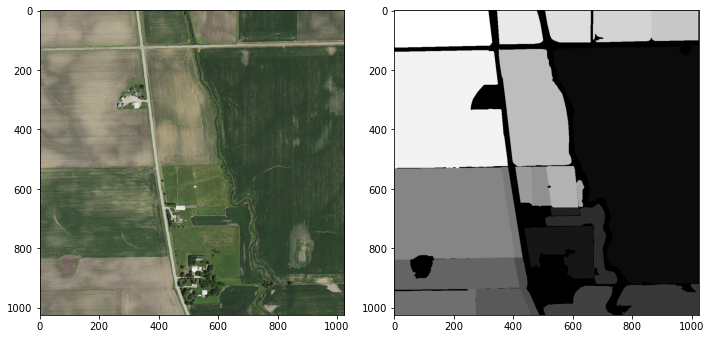

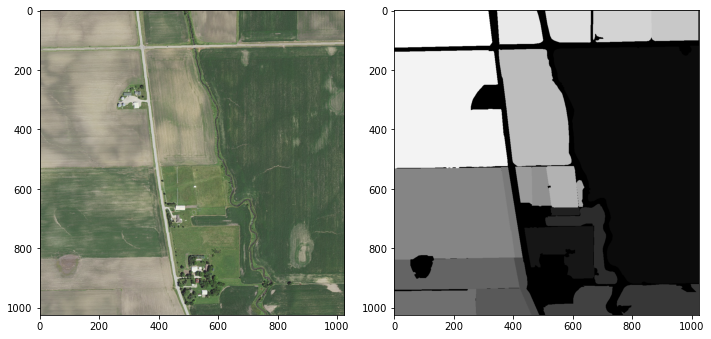

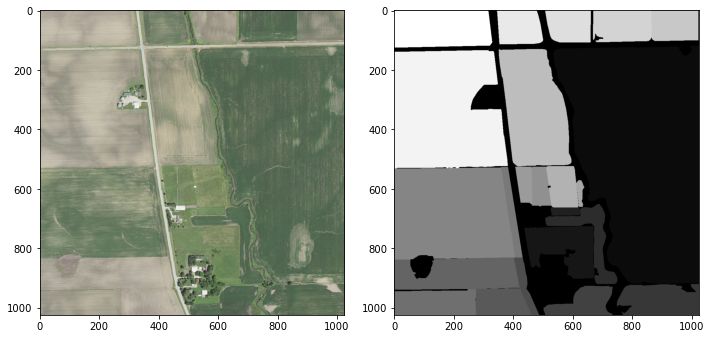

In [12]:
for gamma in (8, 10, 12):
    f,m = t_gamma(np.copy(field), mask, gamma=gamma)
    show_image(f,m)